In [76]:
import numpy as np
import matplotlib.pyplot as plt


dat = np.genfromtxt("MNIST-5-6-Subset/MNIST-5-6-Subset.txt")
labels = np.genfromtxt("MNIST-5-6-Subset/MNIST-5-6-Subset-labels.txt").astype(int)



dat = np.array_split(dat,len(dat)//784)

def img(data,i):
    return data[i].reshape((28,28))

def show(data,i):
    return plt.imshow(img(data,i).T)

In [101]:
N = 100

def dist(x1,x2):
    return (x1-x2).T@(x1-x2)

def knn(i,k = 5):
    dists = [dist(dat[iii],dat[i]) for iii in range(N)]
    nbs = labels[np.argsort(dists)][:k]
    return round(np.mean(nbs))


def loss(y_pred,y_true):
    return 1-np.equal(y_pred, y_true)


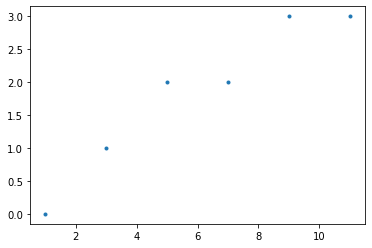

In [121]:
ks = np.arange(0,6)*2+1
guesses = [[knn(i,k) for i in range(N)] for k in ks]

losses = [sum(loss(guesses[i],labels[:N])) for i in range(len(guesses))]


plt.plot(ks,losses,'.')

6.0


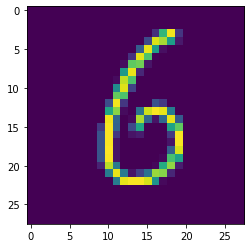

In [42]:
show(dat,3)
print(labels[3])